# NB03: Data Visualisation

In [16]:
import requests
from dotenv import load_dotenv
from functions import *
from bs4 import BeautifulSoup
from pprint import pprint
from auth import *
import base64
import os
import pandas as pd
import json
import csv
import string
import lyricsgenius
import sqlite3
from sqlalchemy import create_engine
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
#! pip install nltk
import nltk
from nltk.corpus import stopwords
import seaborn as sns
#! pip install wordcloud
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import colormaps as cm
import cv2
from scipy.interpolate import splprep, splev 

In [2]:
engine = create_engine('sqlite:///../data/spotify_data.db')

# Query to load the top_tracks table from the SQLite database
query = "SELECT lyrics, gender FROM top_tracks"

# Load data into pandas DataFrame
df = pd.read_sql(query, engine)

# Check the first few rows of the DataFrame
print(df.head())

                                              lyrics  gender
0  166 ContributorsTranslationsTürkçeEspañolPortu...       0
1  116 Lyrics[Verse 1]\nYoungblood thinks there's...       0
2  223 Lyrics[Verse 1]\nFor all the times that yo...       0
3  202 Lyrics[Written by Julia Michaels, Justin T...       0
4  134 Lyrics[Intro: Nicki Minaj]\nYeah\nYoung Mo...       0


In [3]:
df['cleaned_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

In [4]:
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

In [5]:
# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words(male_artists_df)
female_word_freq = get_most_frequent_words(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('yeah', np.int64(238)), ('like', np.int64(236)), ('baby', np.int64(207)), ('know', np.int64(201)), ('oh', np.int64(196)), ('just', np.int64(137)), ('love', np.int64(126)), ('got', np.int64(119)), ('chorus', np.int64(114)), ('don', np.int64(102)), ('ll', np.int64(94)), ('night', np.int64(94)), ('wanna', np.int64(89)), ('cash', np.int64(87)), ('cause', np.int64(80)), ('let', np.int64(78)), ('right', np.int64(77)), ('verse', np.int64(69)), ('say', np.int64(63))]
Most frequent words for female artists: [('like', np.int64(249)), ('oh', np.int64(186)), ('yeah', np.int64(170)), ('baby', np.int64(161)), ('know', np.int64(155)), ('don', np.int64(150)), ('just', np.int64(144)), ('love', np.int64(144)), ('chorus', np.int64(131)), ('ll', np.int64(114)), ('got', np.int64(103)), ('come', np.int64(97)), ('want', np.int64(97)), ('cause', np.int64(96)), ('boom', np.int64(92)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('la', np.int6

In [6]:
# Assuming your DataFrame 'df' contains the lyrics and 'gender' column
# Filter the DataFrame for male (gender = 0) and female (gender = 1) artists
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words(male_artists_df)
female_word_freq = get_most_frequent_words(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('yeah', np.int64(238)), ('like', np.int64(236)), ('baby', np.int64(207)), ('know', np.int64(201)), ('oh', np.int64(196)), ('just', np.int64(137)), ('love', np.int64(126)), ('got', np.int64(119)), ('chorus', np.int64(114)), ('don', np.int64(102)), ('ll', np.int64(94)), ('night', np.int64(94)), ('wanna', np.int64(89)), ('cash', np.int64(87)), ('cause', np.int64(80)), ('let', np.int64(78)), ('right', np.int64(77)), ('verse', np.int64(69)), ('say', np.int64(63))]
Most frequent words for female artists: [('like', np.int64(249)), ('oh', np.int64(186)), ('yeah', np.int64(170)), ('baby', np.int64(161)), ('know', np.int64(155)), ('don', np.int64(150)), ('just', np.int64(144)), ('love', np.int64(144)), ('chorus', np.int64(131)), ('ll', np.int64(114)), ('got', np.int64(103)), ('come', np.int64(97)), ('want', np.int64(97)), ('cause', np.int64(96)), ('boom', np.int64(92)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('la', np.int6

In [7]:
# Assuming 'df' is your main dataframe containing the 'gender' and 'lyrics' columns
male_artists_df = df[df['gender'] == 0]
female_artists_df = df[df['gender'] == 1]

# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words_final(male_artists_df)
female_word_freq = get_most_frequent_words_final(female_artists_df)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(400)), ('baby', np.int64(207)), ('know', np.int64(201)), ('love', np.int64(126)), ('night', np.int64(94)), ('cash', np.int64(87)), ('let', np.int64(78)), ('right', np.int64(77)), ('hey', np.int64(63)), ('say', np.int64(63)), ('dance', np.int64(62)), ('happy', np.int64(60)), ('lose', np.int64(57)), ('make', np.int64(53)), ('girl', np.int64(52)), ('feel', np.int64(51)), ('time', np.int64(50)), ('good', np.int64(46)), ('pour', np.int64(46)), ('way', np.int64(45))]
Most frequent words for female artists: [('baby', np.int64(161)), ('know', np.int64(155)), ('love', np.int64(144)), ('come', np.int64(97)), ('want', np.int64(97)), ('let', np.int64(89)), ('gimme', np.int64(85)), ('tell', np.int64(68)), ('time', np.int64(64)), ('boy', np.int64(54)), ('way', np.int64(50)), ('fuck', np.int64(49)), ('make', np.int64(48)), ('music', np.int64(48)), ('somethin', np.int64(46)), ('bass', np.int64(44)), ('away', np.int64(43)), ('womanizer', np.int64

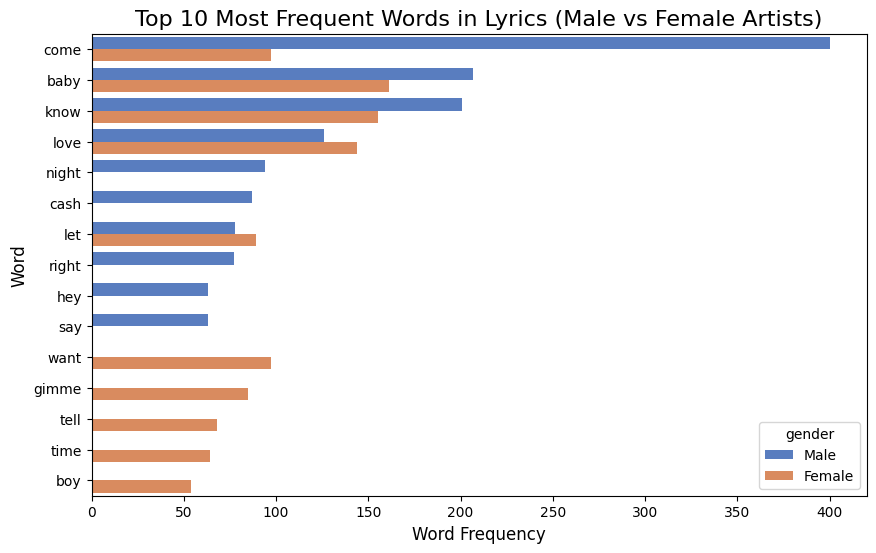

In [8]:
def plot_word_frequencies(male_word_freq, female_word_freq, top_n=10):
    # Extract the top N most frequent words
    male_words, male_counts = zip(*male_word_freq[:top_n])
    female_words, female_counts = zip(*female_word_freq[:top_n])

    # Create a DataFrame for plotting
    male_df = pd.DataFrame({'word': male_words, 'count': male_counts, 'gender': 'Male'})
    female_df = pd.DataFrame({'word': female_words, 'count': female_counts, 'gender': 'Female'})
    
    # Combine the DataFrames
    combined_df = pd.concat([male_df, female_df])

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', hue='gender', data=combined_df, palette='muted')
    
    # Set labels and title
    plt.title('Top 10 Most Frequent Words in Lyrics (Male vs Female Artists)', fontsize=16)
    plt.xlabel('Word Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()

# Call the function with the top frequent words for male and female artists
plot_word_frequencies(male_word_freq, female_word_freq, top_n=10)

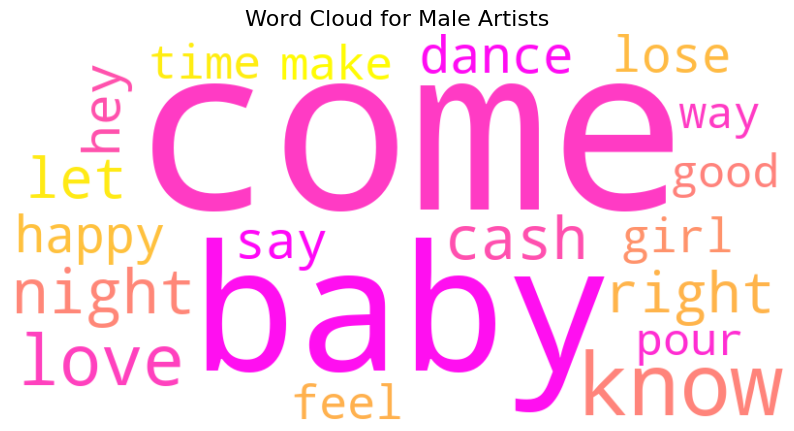

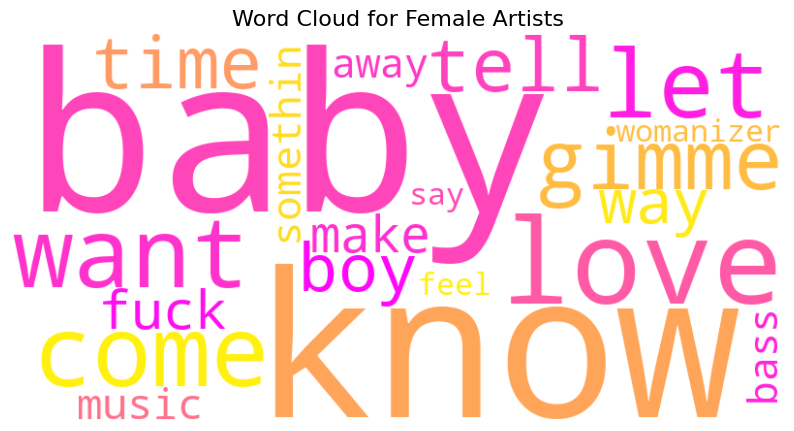

In [9]:
def plot_word_cloud(word_freq, title="Word Cloud"):
    # Create a dictionary with words and their corresponding frequencies
    word_dict = dict(word_freq)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='spring_r').generate_from_frequencies(word_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(title, fontsize=16)
    plt.show()

# Plot the word cloud for male and female artists
plot_word_cloud(male_word_freq, title="Word Cloud for Male Artists")
plot_word_cloud(female_word_freq, title="Word Cloud for Female Artists")

In [10]:
db_path = '../data/spotify_data.db'
conn = sqlite3.connect(db_path)

# Query the database to retrieve lyrics and gender
query = "SELECT lyrics, gender FROM top_tracks WHERE lyrics IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

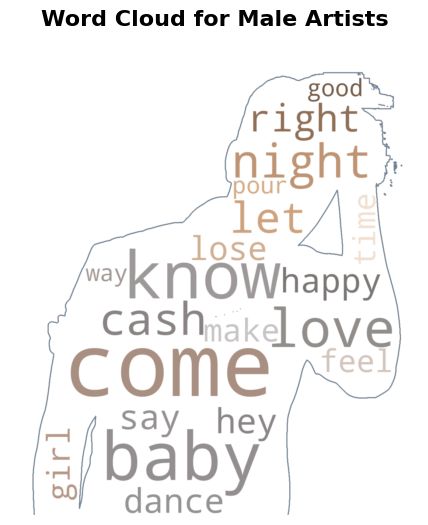

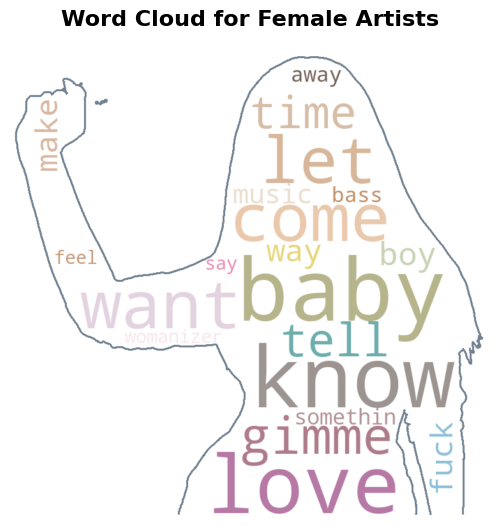

In [11]:
def plot_shaped_word_cloud(word_freq, mask_path, title="Word Cloud", max_words=1000):
    """
    Generate and plot a word cloud with a given shape, contour, and more frequent words.
    Uses mask's colors for the word cloud and ensures the contour is visible.
    """
    # Create a dictionary with words and their corresponding frequencies
    word_dict = dict(word_freq)
    
    # Load the mask image and ensure it's in RGB mode
    mask = np.array(Image.open(mask_path).convert("RGB"))
    
    # Generate the word cloud with a contour and more words
    wc = WordCloud(
        background_color="white",
        max_words=max_words,  # Adjust this value to increase the number of words
        mask=mask,
        stopwords=STOPWORDS,
        contour_width=3,  # Thickness of the contour
        contour_color="slategrey",  # Color of the contour
        colormap="spring_r"  # To give color to words, using mask's colors
    ).generate_from_frequencies(word_dict)
    
    # Create coloring from the image to use for word colors
    image_colors = ImageColorGenerator(mask)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")  # Plot word cloud with contour first
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")  # Apply colors from the mask after
    plt.axis("off")  # Turn off the axis
    plt.title(title, fontsize=16, weight='bold', pad=20)
    plt.show()

# Example Usage
male_mask_path = "../images/justin_3.png"  # Replace with your mask file path
female_mask_path = "../images/nicki.png"  # Replace with your mask file path

# Increase max_words to get more frequent words in the word cloud
plot_shaped_word_cloud(male_word_freq, mask_path=male_mask_path, title="Word Cloud for Male Artists", max_words=500)
plot_shaped_word_cloud(female_word_freq, mask_path=female_mask_path, title="Word Cloud for Female Artists", max_words=500)


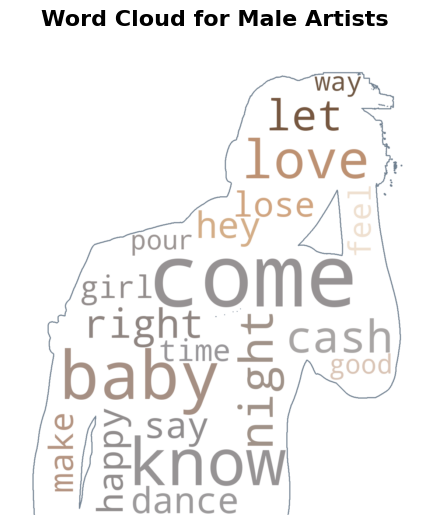

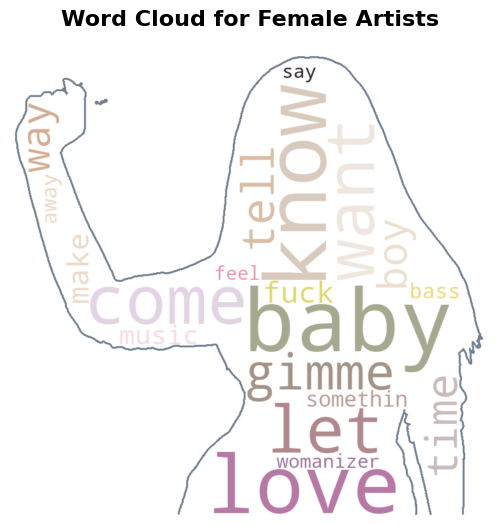

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def plot_shaped_word_cloud(word_freq, mask_path, title="Word Cloud", max_words=1000, contour_fill="lightblue"):
    """
    Generate and plot a word cloud with a given shape and contour.
    """
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    import numpy as np
    from PIL import Image

    # Create a dictionary with words and their corresponding frequencies
    word_dict = dict(word_freq)

    # Load the mask image and ensure it's in RGB mode
    mask = np.array(Image.open(mask_path).convert("RGB"))

    # Generate the word cloud
    wc = WordCloud(
        background_color="white",
        max_words=max_words,
        mask=mask,
        stopwords=STOPWORDS,
        contour_width=3,
        contour_color="slategrey",
        colormap="spring_r"
    ).generate_from_frequencies(word_dict)

    # Create coloring from the image
    image_colors = ImageColorGenerator(mask)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16, weight='bold', pad=20)

    # Return the figure object
    return plt.gcf()

# Example Usage
male_mask_path = "../images/justin_3.png"  # Replace with your mask file path
female_mask_path = "../images/nicki.png"  # Replace with your mask file path

# Generate and save the male word cloud
male_plot = plot_shaped_word_cloud(male_word_freq, mask_path=male_mask_path, title="Word Cloud for Male Artists", max_words=500)
male_plot.savefig('../images/male_wordcloud.png', format='png', dpi=300, bbox_inches='tight')

# Generate and save the female word cloud
female_plot = plot_shaped_word_cloud(female_word_freq, mask_path=female_mask_path, title="Word Cloud for Female Artists", max_words=500)
female_plot.savefig('../images/female_wordcloud.png', format='png', dpi=300, bbox_inches='tight')



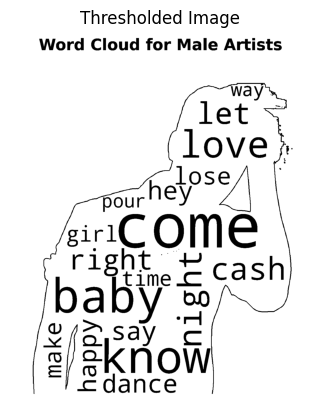

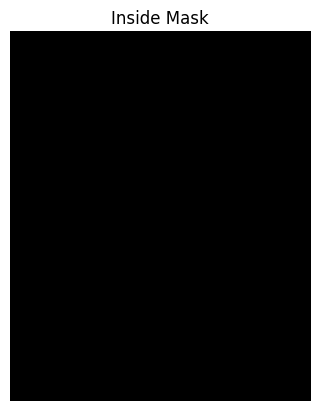

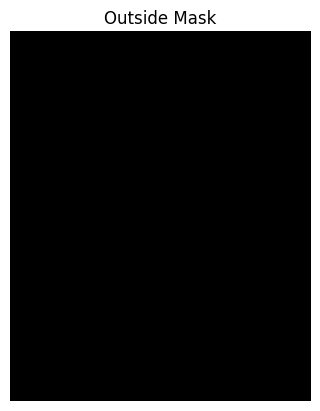

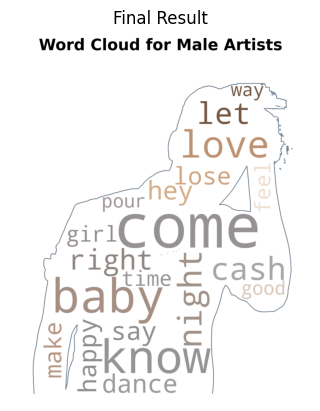

Processed image saved at: ../images/male_wordcloud_filled.png


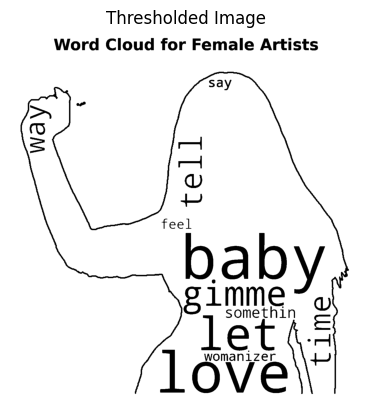

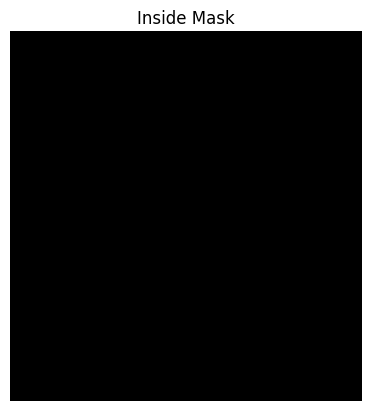

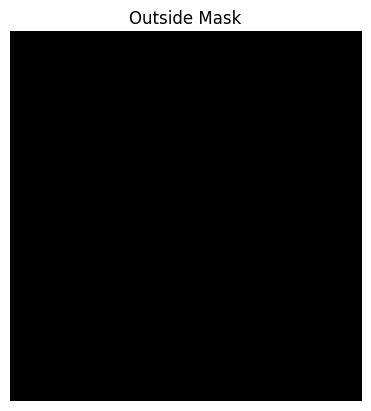

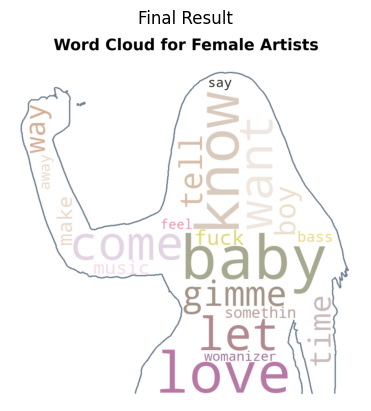

Processed image saved at: ../images/female_wordcloud_filled.png


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def process_and_fill_mask(mask_path, fill_color=(255, 0, 0), debug=False):
    # Load the mask image (WordCloud saved image)
    orig_im = cv2.imread(mask_path)
    if orig_im is None:
        raise ValueError(f"Error: Image not found at {mask_path}")

    # Convert image to grayscale
    gray = cv2.cvtColor(orig_im, cv2.COLOR_BGR2GRAY)

    # Apply threshold to create a binary image (adjust the thresholding)
    _, thresh_gray = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    if debug:
        plt.figure()
        plt.title("Thresholded Image")
        plt.imshow(thresh_gray, cmap='gray')
        plt.axis('off')
        plt.show()

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        raise ValueError("No contours found in the image.")

    # Create a mask for the inside contour (word cloud)
    inside_mask = np.zeros_like(thresh_gray)
    cv2.drawContours(inside_mask, contours, -1, 255, thickness=cv2.FILLED)

    # Check the inside mask
    if debug:
        plt.figure()
        plt.title("Inside Mask")
        plt.imshow(inside_mask, cmap='gray')
        plt.axis('off')
        plt.show()

    # Create the outside mask by inverting the inside mask
    outside_mask = cv2.bitwise_not(inside_mask)

    if debug:
        plt.figure()
        plt.title("Outside Mask")
        plt.imshow(outside_mask, cmap='gray')
        plt.axis('off')
        plt.show()

    # Create a background filled with the specified color (red, green, etc.)
    filled_background = np.ones_like(orig_im) * np.array(fill_color, dtype=np.uint8)

    # Apply the inside mask to retain the original word cloud, and fill the outside with the color
    result = cv2.bitwise_and(orig_im, orig_im, mask=inside_mask)
    result += cv2.bitwise_and(filled_background, filled_background, mask=outside_mask)

    if debug:
        plt.figure()
        plt.title("Final Result")
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # Save result
    save_path = mask_path.replace(".png", "_filled.png")
    cv2.imwrite(save_path, result)
    print(f"Processed image saved at: {save_path}")

    return result

# Example Usage
male_mask_path = "../images/male_wordcloud.png"
female_mask_path = "../images/female_wordcloud.png"

# Process and debug
male_result = process_and_fill_mask(male_mask_path, fill_color=(0, 255, 0), debug=True)
female_result = process_and_fill_mask(female_mask_path, fill_color=(255, 0, 0), debug=True)
